In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset explanation

In [7]:
from utils import *

G = load_email()
show_mail_graph(G, k_core=5)

Calculating and adding node attribute 'degree'...


alt.LayerChart(...)

# Preliminary analysis
## Spy Plot

The sparsity plot (spyplot) of the adjacency matrix with the nodes ordered by their department is a sanity check.

If we get diagonal blocks it means that people inside their department sends each other a lot of mails, while they tend to send few to people of other departments.
And this is actually what we get. At the same time, there are some people (departments 32-37) who sends email to all the people. Our hypothesis is that they are the
managers or system admin department. We can already predict that it will be hard for these departments to separate them into their respective communities.
Additionally, we can notice that the communities vary drastically in size, and some are very small, like the 18th or the 12th.

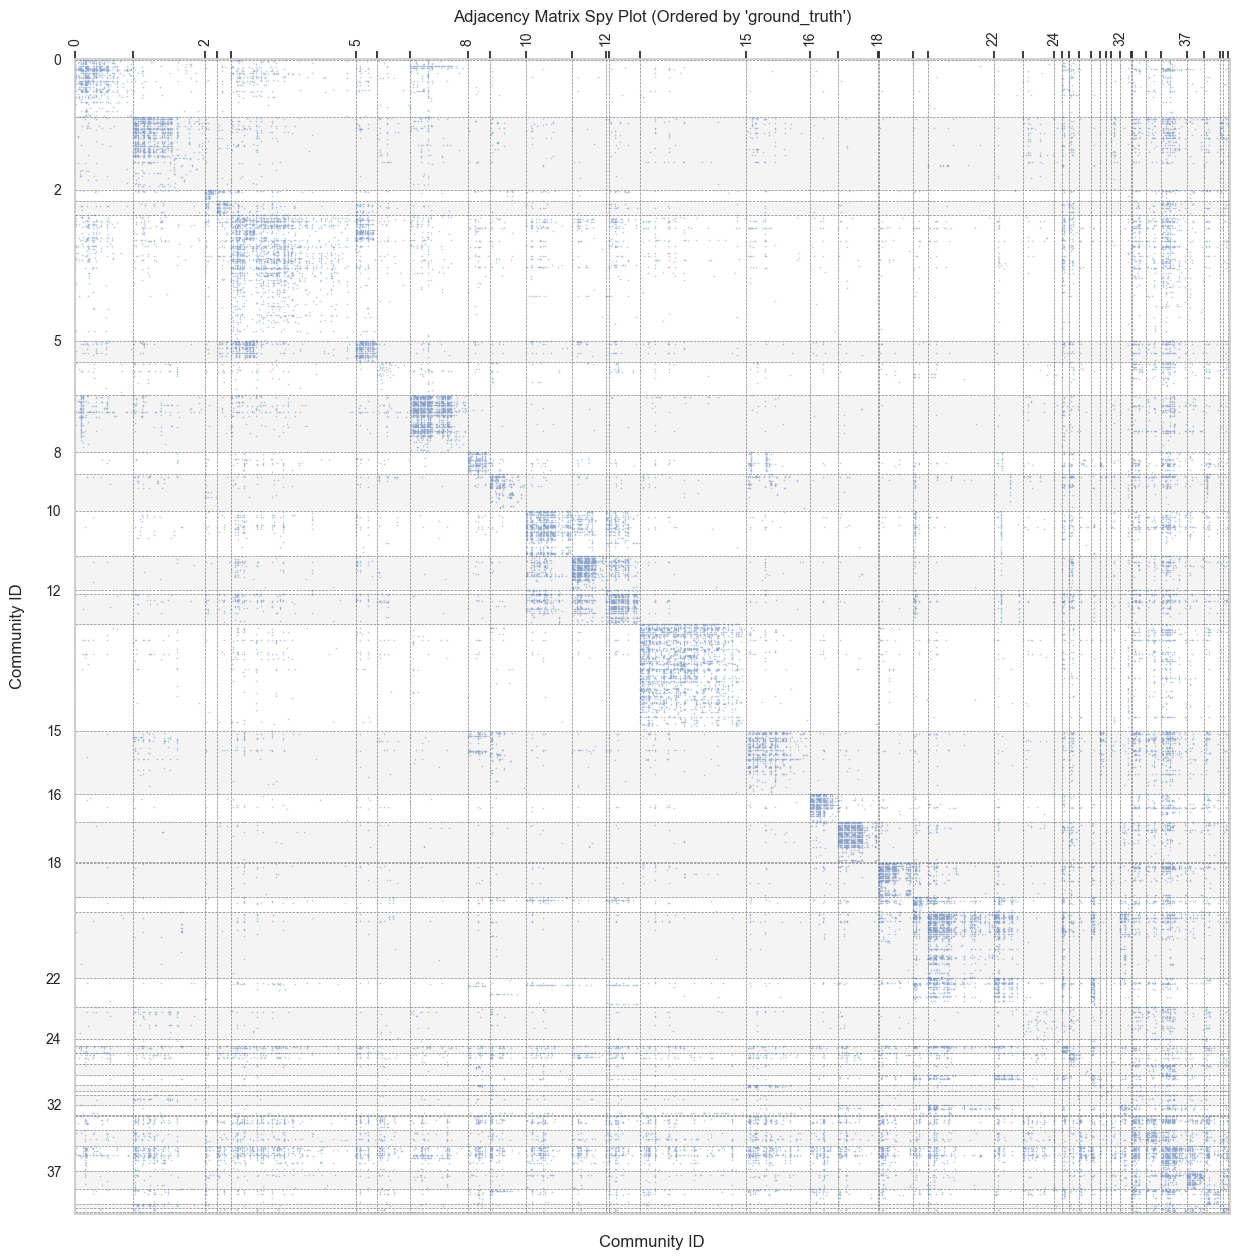

In [8]:
from utils import *

spy_plot_adjacency(G)

## General statistics
From the values of the diameter and the avg shortest path length, we can say that the network exhibits the classic "small-world" property. The degree distribution is
heavily right-skewed. It also indicates the presence of few highly connected nodes (hubs) whose degrees extend towards 350. The network's communication flow is largely
driven by these hubs (likely managers, system admins, or highly collaborative individuals), while the majority of nodes have lower connectivity.

The Clique Size (k) Distribution plot shows a roughly normal (bell-shaped) distribution centered around $k \approx 9$ to 10. This suggests a strong, consistent tendency
for nodes to organize into tightly connected, medium-sized groups (cliques). This is a strong indicator of robust community structure. Also, this can be noticed by the
high value of the clustering coefficient. In a random graph it is rougly equal to the density, but here we have $0.4 \gg 0.03$.


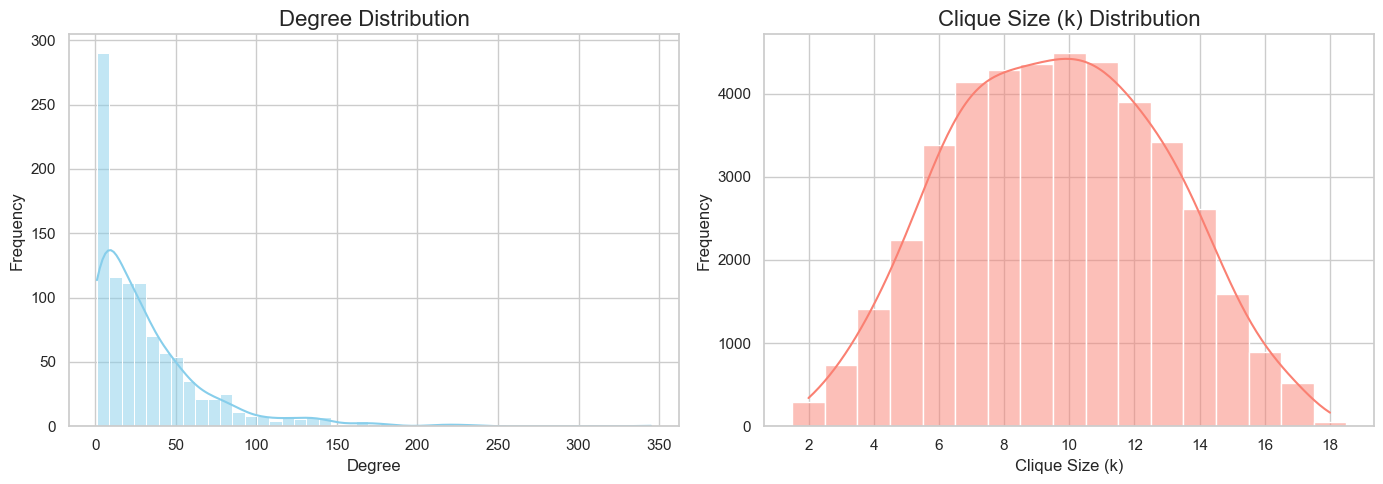

Number of nodes: 986
Number of edges: 16064
Average degree: 32.58
Density: 0.0331
Average clustering coefficient: 0.4071
Graph is connected.
Radius: 4
Diameter: 7
Average shortest path length: 2.59


In [9]:
hist_degrees_cliques(G)
summary_stats(G)


## Centrality Measures



Skipping 'pagerank': attribute already exists.
Skipping 'betweenness_centrality': attribute already exists.
Skipping 'closeness_centrality': attribute already exists.
Skipping 'laplacian_centrality': attribute already exists.
Skipping 'eigenvector_centrality': attribute already exists.


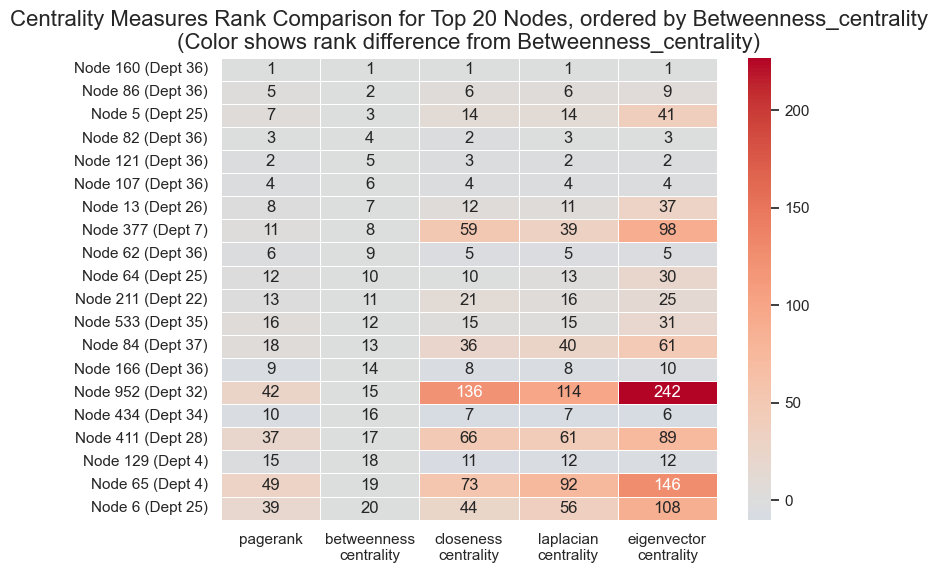

In [51]:
import networkx as nx
from utils import *

centralities = calculate_centrality_metrics(G, [nx.pagerank, nx.betweenness_centrality, nx.closeness_centrality, nx.laplacian_centrality, nx.eigenvector_centrality])
visualize_top_n_centrality(centralities, 'betweenness_centrality')

In [32]:
generic_show(G, node_color='ground_truth',
             node_size='pagerank',
             node_tooltip=['ground_truth', 'degree', 'pagerank', 'betweenness_centrality'],
             k_core=34)

alt.LayerChart(...)